# Задание к занятию «Построение марковских моделей для временных рядов»

Описание задания:

- Скачайте текст войны и мир (ссылка на github и гугл диск). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов

- Выберите ряд  и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.


In [84]:
import glob
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [138]:
text = ""
for filename in glob.glob("./*.txt"):
    f = open(filename, 'r', encoding='utf8')
    text += (f.read())
    f.close()
print(len(text))

2993415


In [139]:
text[1000:2000]

'есмотря на ухабы дороги, не просыпался, лежа на дне перекладных саней, подле Ростова, который, по мере приближения к Москве, приходил все более и более в нетерпение.\n\n«Скоро ли? Скоро ли? О, эти несносные улицы, лавки, калачи, фонари, извозчики!» думал Ростов, когда уже они записали свои отпуски на заставе и въехали в Москву.\n\n– Денисов, приехали! Спит! – говорил он, всем телом подаваясь вперед, как будто он этим положением надеялся ускорить движение саней. Денисов не откликался.\n\n– Вот он угол-перекресток, где Захар извозчик стоит; вот он и Захар, и всё та же лошадь. Вот и лавочка, где пряники покупали. Скоро ли? Ну!\n\n– К какому дому-то? – спросил ямщик.\n\n– Да вон на конце, к большому, как ты не видишь! Это наш дом, – говорил Ростов, – ведь это наш дом! Денисов! Денисов! Сейчас приедем.\n\nДенисов поднял голову, откашлялся и ничего не ответил.\n\n– Дмитрий, – обратился Ростов к лакею на облучке. – Ведь это у нас огонь?\n\n– Так точно-с и у папеньки в кабинете светится.\n\n–

In [140]:
text = re.sub('[^а-яА-Я ]','', text)

In [141]:
text[1000:2000]

'ики покупали Скоро ли Ну К какому домуто  спросил ямщик Да вон на конце к большому как ты не видишь Это наш дом  говорил Ростов  ведь это наш дом Денисов Денисов Сейчас приедемДенисов поднял голову откашлялся и ничего не ответил Дмитрий  обратился Ростов к лакею на облучке  Ведь это у нас огонь Так точнос и у папеньки в кабинете светится Еще не ложились А как ты думаешь Смотри же не забудь тотчас достань мне новую венгерку  прибавил Ростов ощупывая новые усы  Ну же пошел  кричал он ямщику  Да проснись же Вася  обращался он к Денисову который опять опустил голову  Да ну же пошел три целковых на водку пошел  закричал Ростов когда уже сани были за три дома от подъезда Ему казалось что лошади не двигаются Наконец сани взяли вправо к подъезду над головой своей Ростов увидал знакомый карниз с отбитой штукатуркой крыльцо тротуарный столб Он на ходу выскочил из саней и побежал в сени Дом также стоял неподвижно нерадушно как будто ему дела не было до того кто приехал в него В сенях никого не б

Удалим множественные пробелы

In [142]:
text = re.sub(' +',' ', text)

In [143]:
text[1000:2000]

'окупали Скоро ли Ну К какому домуто спросил ямщик Да вон на конце к большому как ты не видишь Это наш дом говорил Ростов ведь это наш дом Денисов Денисов Сейчас приедемДенисов поднял голову откашлялся и ничего не ответил Дмитрий обратился Ростов к лакею на облучке Ведь это у нас огонь Так точнос и у папеньки в кабинете светится Еще не ложились А как ты думаешь Смотри же не забудь тотчас достань мне новую венгерку прибавил Ростов ощупывая новые усы Ну же пошел кричал он ямщику Да проснись же Вася обращался он к Денисову который опять опустил голову Да ну же пошел три целковых на водку пошел закричал Ростов когда уже сани были за три дома от подъезда Ему казалось что лошади не двигаются Наконец сани взяли вправо к подъезду над головой своей Ростов увидал знакомый карниз с отбитой штукатуркой крыльцо тротуарный столб Он на ходу выскочил из саней и побежал в сени Дом также стоял неподвижно нерадушно как будто ему дела не было до того кто приехал в него В сенях никого не было Боже мой все 

## матрица переходных вероятностей

In [ ]:
Пробелы в словарь не добавляем. Матрицу переходных вероятностей считаем только между буквами.
Инициализируем матрицу единицами, чтобы избежать деления на ноль

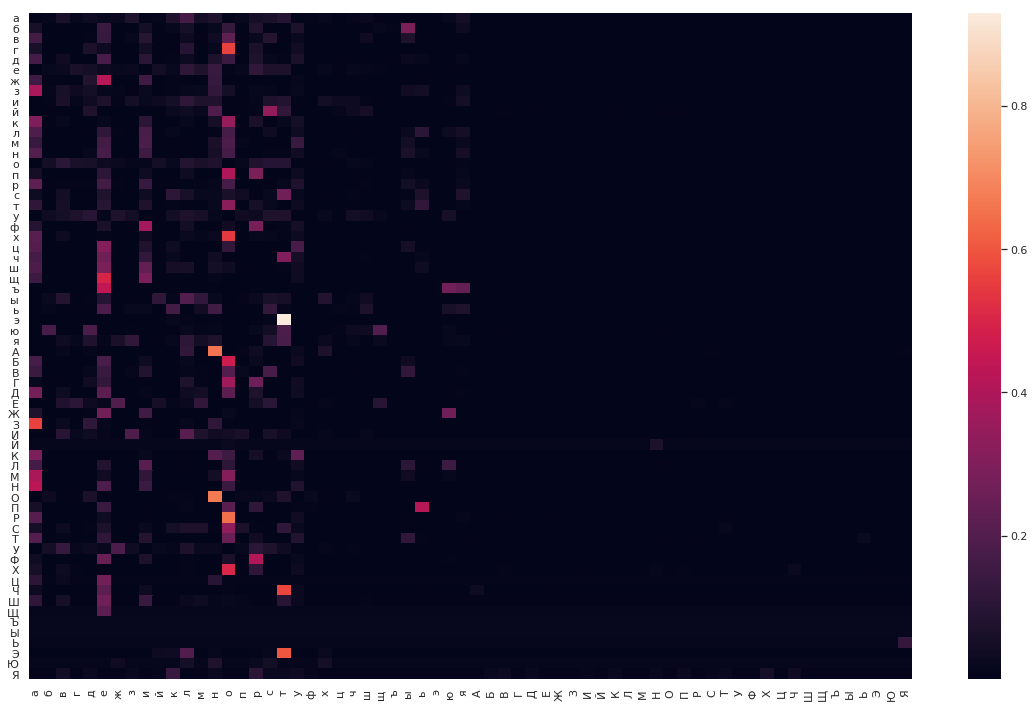

In [178]:
RUSSIAN = 'абвгдежзийклмнопрстуфхцчшщъыьэюя'
RUSSIAN += RUSSIAN.upper()
POS = {l: i for i, l in enumerate(RUSSIAN)}

probabilities = np.ones((len(RUSSIAN), len(RUSSIAN)))

for cp, cn in zip(text[:-1], text[1:]):
    if (cp!=' ') and (cn!=' '):
        probabilities[POS[cp], POS[cn]] += 1

probabilities = (probabilities / probabilities.sum(axis=1)[:, None])
    

df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

plt.figure(figsize=(16,10))
sns.heatmap(df, xticklabels=True, yticklabels=True)
plt.tight_layout()
plt.show()

In [179]:
df.head()

,а,б,в,г,д,е,ж,з,и,й,...,Ц,Ч,Ш,Щ,Ъ,Ы,Ь,Э,Ю,Я
а,0.000156,0.011540,0.062077,0.015896,0.036020,0.018248,0.022398,0.075898,0.002245,0.012180,...,0.000014,0.000107,0.000036,0.000007,0.000007,0.000007,0.000007,0.000050,0.000007,0.000043
б,0.059204,0.000674,0.005826,0.000755,0.001618,0.141308,0.000539,0.000081,0.050249,0.000027,...,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027
в,0.166518,0.000371,0.000964,0.001126,0.008962,0.132898,0.000035,0.015045,0.094612,0.000012,...,0.000023,0.000070,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000023,0.000012
г,0.059897,0.000024,0.002393,0.000095,0.065844,0.029854,0.000071,0.000095,0.046036,0.000024,...,0.000024,0.000071,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024
д,0.167532,0.001356,0.038836,0.000293,0.001140,0.176039,0.000601,0.000123,0.103392,0.000031,...,0.000015,0.000046,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015


## вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р

In [180]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUSSIAN)
proba_sum = 0.
for c1 in RUSSIAN:
    for c2 in RUSSIAN:
        proba = prior * probabilities[start, POS[c1]] * probabilities[POS[c1], POS[c2]] * probabilities[POS[c2], end]
        proba_sum += proba
#        if proba > 0:
#            print(''.join(['п', c1, c2, 'р']), proba)

In [181]:
proba_sum

0.0006258734868109506

## генерация слова  с буквы "Б" длинной  8 символов

In [182]:
s = []
start = 'Б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

Боминерам


## HMM

In [184]:
#!pip install hmmlearn

In [185]:
series = pd.read_csv('ozone-concentration-azusa-195619.csv').iloc[:, -1]

In [190]:
from hmmlearn.hmm import GaussianHMM
import warnings
warnings.filterwarnings('ignore')

In [191]:
values = series.values.reshape(-1,1)

In [210]:
X_train = values[:150]
X_test = values[150:]

In [213]:
X_train.shape, X_test.shape

((150, 1), (30, 1))

In [218]:
for n in range(1, 30):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(X_train)
    print (n, model.score(X_train))

1 -319.3406189236015
2 -281.52606675966905
3 -263.9580211160176
4 -255.33434362110174
5 -237.57809626386467
6 -233.00727909394715
7 -225.7621088237157
8 -218.22635770332687
9 -208.29682578594446
10 -208.55904453367464
11 -206.92707686444106
12 -202.00809181074715
13 -194.40660889543742
14 -180.08971712403493
15 -171.9981552817303
16 -161.5300346729643
17 -159.83337348819225
18 -157.5455853822716
19 -141.43629308405244
20 -130.65400000240246
21 -131.051581235674
22 -129.87771450159886
23 -120.74109068728082
24 -119.91498134832922
25 -120.93043495878746
26 -100.61356153752376
27 -99.2826147925013
28 -101.52807052129863
29 -98.88646734759419


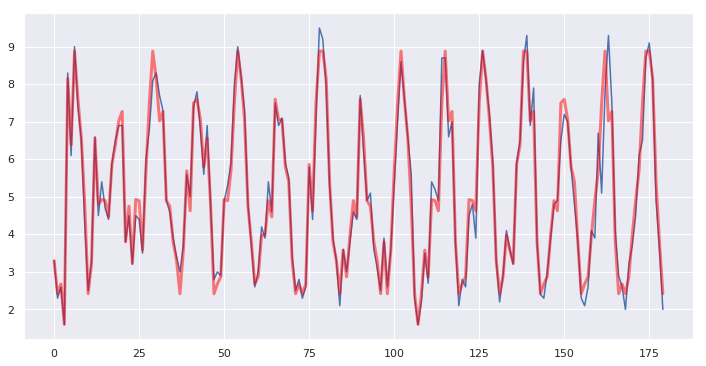

In [223]:

model = GaussianHMM(n_components=29,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(X_train)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3, alpha=0.5, color='red')


Обучились на 150 точках, сделали прогноз на следующие 30